In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
import seaborn as sns
from matplotlib import font_manager, rc, rcParams
from sklearn.model_selection import train_test_split
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False
%matplotlib notebook

<IPython.core.display.Javascript object>


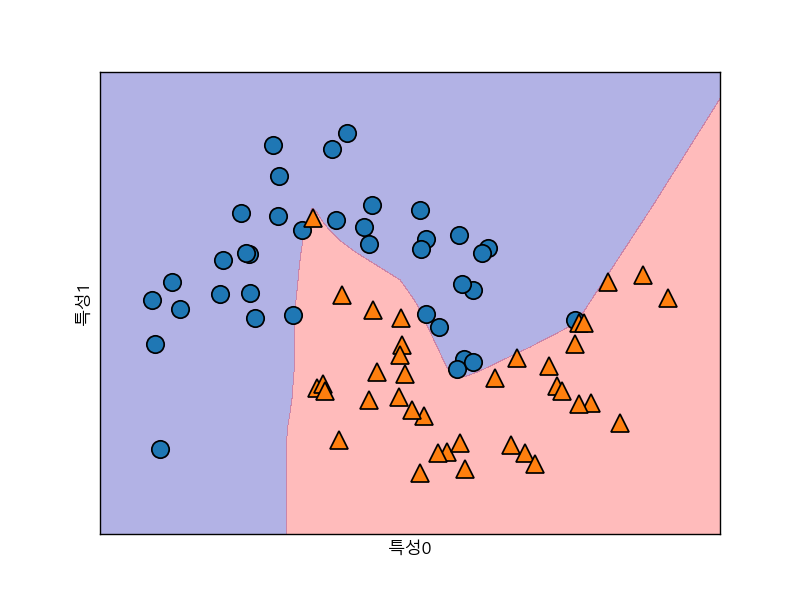

Text(0, 0.5, '특성1')

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25,random_state=3)

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('특성0')
plt.ylabel('특성1')

<IPython.core.display.Javascript object>


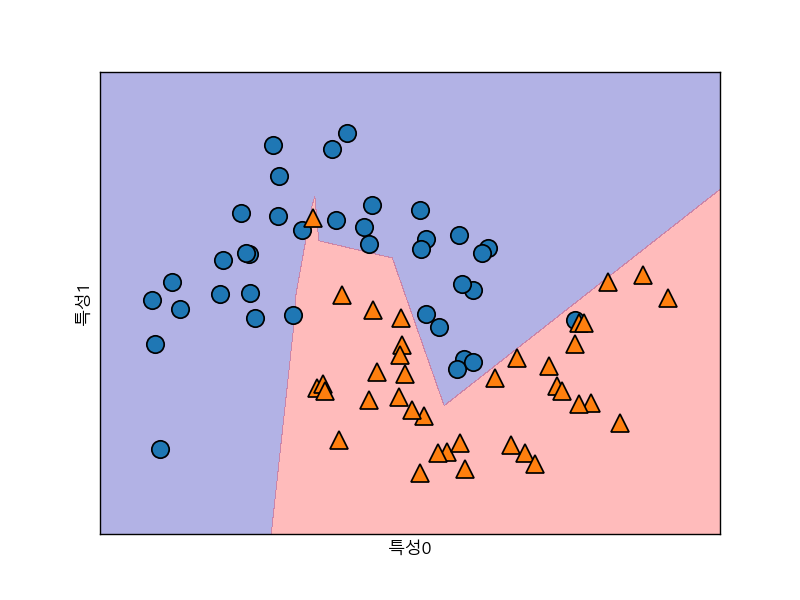

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성1')

In [8]:
plt.figure()
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('특성0')
plt.ylabel('특성1')

In [20]:
def mlp_figure(n=[10],f='relu'):    
    plt.figure()
    mlp = MLPClassifier(solver='lbfgs',activation=f,random_state=0,hidden_layer_sizes=n).fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
    plt.xlabel('특성0')
    plt.ylabel('특성1')

<IPython.core.display.Javascript object>


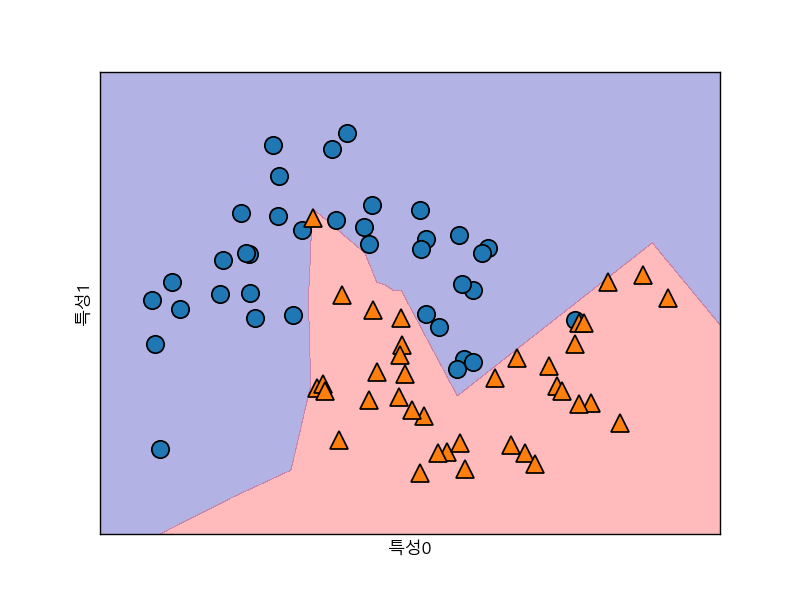

In [10]:
mlp_figure([10,10])

<IPython.core.display.Javascript object>


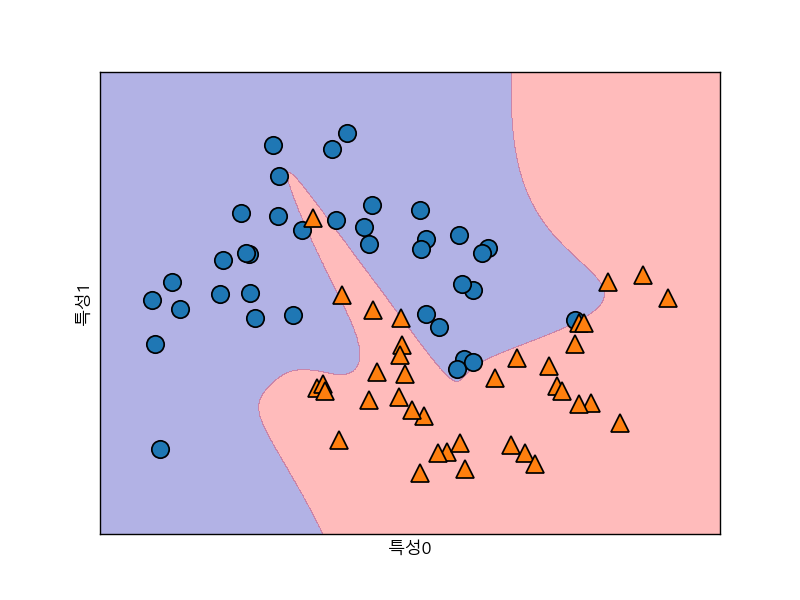

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [21]:
mlp_figure([10,10,10,10,10,10],'tanh')

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

In [24]:
mlp = MLPClassifier(random_state=42).fit(X_train,y_train)
print('train set score : {:.3f}'.format(mlp.score(X_train,y_train)))
print('test set score : {:.3f}'.format(mlp.score(X_test,y_test)))

train set score : 0.939
test set score : 0.916


In [26]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [27]:
mlp = MLPClassifier(random_state=42).fit(X_train_scaled,y_train)
print('train set score : {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('test set score : {:.3f}'.format(mlp.score(X_test_scaled,y_test)))
# 반복횟수가 부족하다는 경고 메시지

train set score : 0.993
test set score : 0.965


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
mlp = MLPClassifier(max_iter=1000,random_state=0).fit(X_train_scaled,y_train)
print('train set score : {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('test set score : {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

train set score : 1.000
test set score : 0.972


In [32]:
# alpha 를 이용한 규제 1은 엄청크다. 0.0001 디폴트
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=0).fit(X_train_scaled,y_train)
print('train set score : {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('test set score : {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

train set score : 0.988
test set score : 0.972
